# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
# Your code here! :)
df = pd.read_csv('GermanCredit.csv')

In [3]:
df.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [4]:
X, y = df.drop('Class', axis=1), df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
dtc = DecisionTreeClassifier(random_state=0)
params = {'max_depth': [None,3,4,5,6], 'min_samples_split': [2,3,4]}
clf = GridSearchCV(estimator=dtc, param_grid=params)

In [6]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 3, 4, 5, 6], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
clf.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [18]:
y_pred = clf.predict(X_test)
# evaluate predictions
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))

Accuracy: 66.67%


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [16]:
! pip install dtreeviz --user

  Running setup.py bdist_wheel for dtreeviz ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/d8/74/06/0d9d450156c7cb2f1fcfb51a55b1542d26f459f557d742c406
Successfully built dtreeviz
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
mxnet-cu80 1.2.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.13.2 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
! pip list | grep -F 'dtreeviz'

dtreeviz                           0.8.1            
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [62]:
! pip install graphviz==0.9.0 --user

pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
mxnet-cu80 1.2.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.9 which is incompatible.
  Found existing installation: graphviz 0.13.2
    Uninstalling graphviz-0.13.2:
      Successfully uninstalled graphviz-0.13.2
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
! pip list | grep -F 'dtreeviz'

dtreeviz                           0.8.1            
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
! sudo apt-get dist-upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following packages were automatically installed and are no longer required:
  libarmadillo4 libarpack2 libcf0 libdap-dev libdap11 libdapclient3
  libdapserver7 libepsilon1 libfreexl1 libgeos-3.4.2 libgeos-c1 libgeos-dev
  libgif-dev libgif4 libhdf4-0-alt libhdf4-alt-dev libkml0 libltdl-dev
  libmariadbclient18 libnetcdf-dev libnetcdfc++4 libnetcdfc7 libnetcdff5
  libogdi3.2 libpoppler44 libpq-dev libspatialite-dev libspatialite5
  libsqlite3-dev libtool liburiparser1 libwebp-dev libwebp5 libwebpdemux1
  libwebpmux1 libxerces-c-dev libxerces-c3.1 mariadb-common odbcinst
  odbcinst1debian2 proj-bin uuid-dev
Use 'apt-get autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [7]:
! sudo apt-get update

Get:1 http://apt.postgresql.org precise-pgdg InRelease [41.0 kB]
Ign http://cran.rstudio.com trusty/ InRelease                                  
Get:2 http://cran.rstudio.com trusty/ Release.gpg [488 B]                      
Ign http://developer.download.nvidia.com  InRelease                            
Get:3 http://developer.download.nvidia.com  Release.gpg [833 B]                
Get:4 http://developer.download.nvidia.com  Release [564 B]                    
Get:5 http://apt.postgresql.org precise-pgdg/main amd64 Packages [141 kB]      
Get:6 http://developer.download.nvidia.com  Packages [82.7 kB]                 
Get:7 http://security.ubuntu.com trusty-security InRelease [65.9 kB]           
Get:8 http://ppa.launchpad.net trusty InRelease [15.5 kB]                      
Get:9 http://cran.rstudio.com trusty/ Release [3,068 B]                        
Ign http://archive.ubuntu.com trusty InRelease                                 
Get:10 http://cran.rstudio.com trusty/ Packages [190 kB

In [8]:
! sudo apt-get install build-essential

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version.
The following packages were automatically installed and are no longer required:
  libarmadillo4 libarpack2 libcf0 libdap-dev libdap11 libdapclient3
  libdapserver7 libepsilon1 libfreexl1 libgeos-3.4.2 libgeos-c1 libgeos-dev
  libgif-dev libgif4 libhdf4-0-alt libhdf4-alt-dev libkml0 libltdl-dev
  libmariadbclient18 libnetcdf-dev libnetcdfc++4 libnetcdfc7 libnetcdff5
  libogdi3.2 libpoppler44 libpq-dev libspatialite-dev libspatialite5
  libsqlite3-dev libtool liburiparser1 libwebp-dev libwebp5 libwebpdemux1
  libwebpmux1 libxerces-c-dev libxerces-c3.1 mariadb-common odbcinst
  odbcinst1debian2 proj-bin uuid-dev
Use 'apt-get autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 214 not upgraded.


In [11]:
!sudo apt-get install -y graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libarmadillo4 libarpack2 libcf0 libdap-dev libdap11 libdapclient3
  libdapserver7 libepsilon1 libfreexl1 libgeos-3.4.2 libgeos-c1 libgeos-dev
  libgif-dev libgif4 libhdf4-0-alt libhdf4-alt-dev libkml0 libltdl-dev
  libmariadbclient18 libnetcdf-dev libnetcdfc++4 libnetcdfc7 libnetcdff5
  libogdi3.2 libpoppler44 libpq-dev libspatialite-dev libspatialite5
  libsqlite3-dev libtool liburiparser1 libwebp-dev libwebp5 libwebpdemux1
  libwebpmux1 libxerces-c-dev libxerces-c3.1 mariadb-common odbcinst
  odbcinst1debian2 proj-bin uuid-dev
Use 'apt-get autoremove' to remove them.
The following extra packages will be installed:
  fonts-liberation libcdt5 libcgraph6 libgd3 libgvc6 libgvpr2 libpathplan4
Suggested packages:
  graphviz-doc libgd-tools
The following NEW packages will be installed:
  fonts-liberation graphviz li

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [1]:
from dtreeviz.trees import *

In [20]:
# Your code here! :)
from IPython.display import display, HTML
viz = dtreeviz(clf.best_estimator_,
               X_train,
               y_train.map(lambda x: 0 if x == 'Good' else 1),
               target_name='Class',  # this name will be displayed at the leaf node
               feature_names=  X_train.columns.tolist(),
               class_names = ['Good', 'Bad']
              )
display(HTML(viz.svg()))

/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [11]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
# Your code here! :)
rfc = RandomForestClassifier()
params = {'n_estimators': [100, 150, 200], 'max_depth': [None,3,6,9], 'min_samples_split': [2,3,4]}
rf_clf = GridSearchCV(estimator=rfc, param_grid=params)

In [14]:
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200], 'max_depth': [None, 3, 6, 9], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
rf_clf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [16]:
y_pred = rf_clf.predict(X_test)
# evaluate predictions
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

Accuracy: 75.67%


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [69]:
# Your code here
feature_importance = rf_clf.best_estimator_.feature_importances_
print(feature_importance)

[ 0.07425388  0.10094807  0.03598582  0.03031442  0.08615012  0.01895752
  0.00758036  0.01831952  0.00351812  0.03743618  0.0154497   0.00746523
  0.04921138  0.01537874  0.01019055  0.01460884  0.0080845   0.02571804
  0.02149943  0.00967158  0.01302747  0.0148831   0.00261167  0.00533819
  0.01042019  0.          0.00072954  0.01190876  0.00289918  0.01781898
  0.00924853  0.00649011  0.00505491  0.01135824  0.01552128  0.01298646
  0.01383184  0.01200752  0.01061137  0.0054305   0.01482617  0.01298546
  0.00781647  0.          0.00877454  0.00632161  0.00709345  0.01672087
  0.01325023  0.01389033  0.01254837  0.01273406  0.00650832  0.01574709
  0.01105187  0.01710054  0.0098768   0.00250837  0.0114593   0.01398547
  0.01188086]


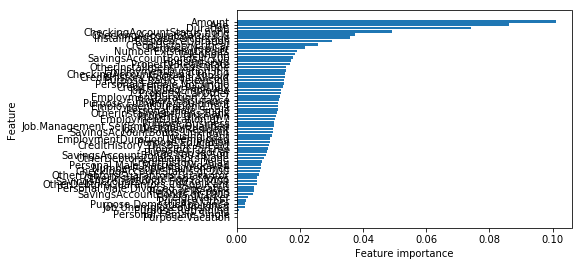

<Figure size 3600x5400 with 0 Axes>

In [70]:
ftr_imp_df = pd.DataFrame(data={'feature': X_train.columns.tolist(), 'importance': feature_importance},
                          columns=['feature', 'importance']).sort_values(by='importance', ascending=True)
plt.barh(ftr_imp_df.feature, width=ftr_imp_df.importance)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.figure(figsize=(50, 75))
plt.show()

In [71]:
ftr_imp_df.tail()

,feature,importance
9,CheckingAccountStatus.lt.0,0.037436
12,CheckingAccountStatus.none,0.049211
0,Duration,0.074254
4,Age,0.086150
1,Amount,0.100948


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [72]:
! pip install pdpbox

pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
mxnet-cu80 1.2.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.9 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

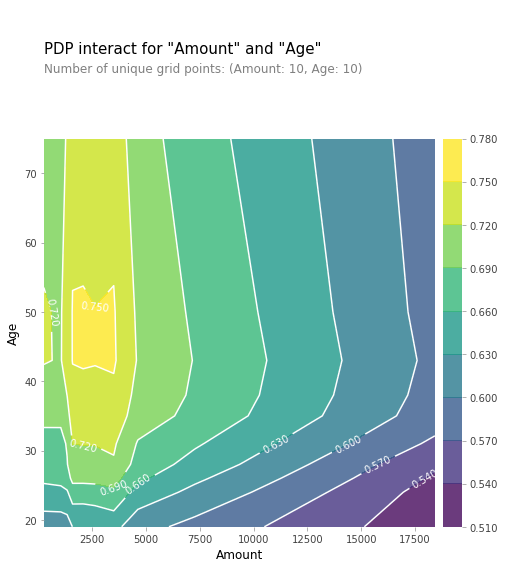

In [73]:
# Your code here!
import pdpbox
from pdpbox import pdp
pdp_interaction = pdp.pdp_interact(rf_clf,X_train,X_train.columns, ['Amount','Age'])
pdp.pdp_interact_plot(pdp_interaction, ['Amount','Age'])
plt.show()

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [74]:
! conda install -c anaconda py-xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base conda



NotWritableError: The current user does not have write permissions to a required path.
  path: /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json
  uid: 12574
  gid: 12574

If you feel that permissions on this path are set incorrectly, you can manually
change them by executing

  $ sudo chown 12574:12574 /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json

In general, it's not advisable to use 'sudo conda'.




In [75]:
! conda install -c conda-forge/label/cf201901 catboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base conda



NotWritableError: The current user does not have write permissions to a required path.
  path: /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json
  uid: 12574
  gid: 12574

If you feel that permissions on this path are set incorrectly, you can manually
change them by executing

  $ sudo chown 12574:12574 /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json

In general, it's not advisable to use 'sudo conda'.




In [39]:
! pip install catboost --user

  Using cached https://files.pythonhosted.org/packages/ca/ae/aaff63662f7f5d2af7ec8d61a6f39e78ada9348e5df4f43e665ecc4bea10/catboost-0.21-cp36-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/08/ec/b5dd8cfb078380fb5ae9325771146bccd4e8cad2d3e4c72c7433010684eb/pandas-1.0.1-cp36-cp36m-manylinux1_x86_64.whl
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
mxnet-cu80 1.2.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.13.2 which is incompatible.
mxnet-cu80 1.2.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.18.1 which is incompatible.
  The scripts f2py, f2py3 and f2py3.6 are installed in '/home/ubuntu/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-locatio

In [76]:
! conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base conda



NotWritableError: The current user does not have write permissions to a required path.
  path: /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json
  uid: 12574
  gid: 12574

If you feel that permissions on this path are set incorrectly, you can manually
change them by executing

  $ sudo chown 12574:12574 /usr/local/anaconda/pkgs/conda-4.5.4-py36_0/info/repodata_record.json

In general, it's not advisable to use 'sudo conda'.




In [36]:
! pip install lightgbm

    100% |████████████████████████████████| 1.2MB 18.0MB/s ta 0:00:01
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
mxnet-cu80 1.2.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.13.2 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

### XGBBoost

In [21]:
! pip list | grep -F 'xgboost'

xgboost                            0.71             
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
# evaluate predictions
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 77.00%


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### CatBoost

In [9]:
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_pred = cb_clf.predict(X_test)
# evaluate predictions
accuracy_cb = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_cb * 100.0))

Learning rate set to 0.008847
0:	learn: 0.6895816	total: 49.8ms	remaining: 49.8s
1:	learn: 0.6851799	total: 51.1ms	remaining: 25.5s
2:	learn: 0.6822382	total: 52.4ms	remaining: 17.4s
3:	learn: 0.6790477	total: 53.7ms	remaining: 13.4s
4:	learn: 0.6747510	total: 54.9ms	remaining: 10.9s
5:	learn: 0.6711383	total: 56.2ms	remaining: 9.31s
6:	learn: 0.6680472	total: 57.4ms	remaining: 8.15s
7:	learn: 0.6648066	total: 58.7ms	remaining: 7.27s
8:	learn: 0.6613893	total: 60ms	remaining: 6.6s
9:	learn: 0.6589748	total: 61.2ms	remaining: 6.06s
10:	learn: 0.6560695	total: 62.5ms	remaining: 5.62s
11:	learn: 0.6534003	total: 63.8ms	remaining: 5.25s
12:	learn: 0.6501893	total: 65.1ms	remaining: 4.94s
13:	learn: 0.6476415	total: 66.5ms	remaining: 4.68s
14:	learn: 0.6441549	total: 67.8ms	remaining: 4.45s
15:	learn: 0.6416784	total: 68.7ms	remaining: 4.22s
16:	learn: 0.6394117	total: 69.9ms	remaining: 4.04s
17:	learn: 0.6364002	total: 71.2ms	remaining: 3.88s
18:	learn: 0.6335407	total: 72.4ms	remaining: 3

250:	learn: 0.4018971	total: 382ms	remaining: 1.14s
251:	learn: 0.4012794	total: 383ms	remaining: 1.14s
252:	learn: 0.4008450	total: 385ms	remaining: 1.14s
253:	learn: 0.4001209	total: 386ms	remaining: 1.13s
254:	learn: 0.3996532	total: 388ms	remaining: 1.13s
255:	learn: 0.3991611	total: 389ms	remaining: 1.13s
256:	learn: 0.3987017	total: 390ms	remaining: 1.13s
257:	learn: 0.3982632	total: 392ms	remaining: 1.13s
258:	learn: 0.3978156	total: 393ms	remaining: 1.12s
259:	learn: 0.3973278	total: 394ms	remaining: 1.12s
260:	learn: 0.3969390	total: 395ms	remaining: 1.12s
261:	learn: 0.3963296	total: 397ms	remaining: 1.12s
262:	learn: 0.3957507	total: 398ms	remaining: 1.11s
263:	learn: 0.3952572	total: 399ms	remaining: 1.11s
264:	learn: 0.3947512	total: 400ms	remaining: 1.11s
265:	learn: 0.3941592	total: 402ms	remaining: 1.11s
266:	learn: 0.3939172	total: 403ms	remaining: 1.11s
267:	learn: 0.3934434	total: 404ms	remaining: 1.1s
268:	learn: 0.3928576	total: 405ms	remaining: 1.1s
269:	learn: 0.

540:	learn: 0.2973026	total: 757ms	remaining: 642ms
541:	learn: 0.2971170	total: 759ms	remaining: 641ms
542:	learn: 0.2967978	total: 760ms	remaining: 640ms
543:	learn: 0.2964440	total: 761ms	remaining: 638ms
544:	learn: 0.2962791	total: 763ms	remaining: 637ms
545:	learn: 0.2960990	total: 764ms	remaining: 635ms
546:	learn: 0.2958203	total: 765ms	remaining: 634ms
547:	learn: 0.2955661	total: 767ms	remaining: 632ms
548:	learn: 0.2952619	total: 768ms	remaining: 631ms
549:	learn: 0.2948878	total: 769ms	remaining: 629ms
550:	learn: 0.2945803	total: 770ms	remaining: 628ms
551:	learn: 0.2943411	total: 772ms	remaining: 626ms
552:	learn: 0.2940096	total: 773ms	remaining: 625ms
553:	learn: 0.2937843	total: 774ms	remaining: 623ms
554:	learn: 0.2935550	total: 775ms	remaining: 622ms
555:	learn: 0.2933973	total: 777ms	remaining: 620ms
556:	learn: 0.2932057	total: 778ms	remaining: 619ms
557:	learn: 0.2929502	total: 779ms	remaining: 617ms
558:	learn: 0.2926796	total: 781ms	remaining: 616ms
559:	learn: 

830:	learn: 0.2271286	total: 1.13s	remaining: 231ms
831:	learn: 0.2268544	total: 1.14s	remaining: 229ms
832:	learn: 0.2266807	total: 1.14s	remaining: 228ms
833:	learn: 0.2264876	total: 1.14s	remaining: 227ms
834:	learn: 0.2262413	total: 1.14s	remaining: 225ms
835:	learn: 0.2260994	total: 1.14s	remaining: 224ms
836:	learn: 0.2259037	total: 1.14s	remaining: 223ms
837:	learn: 0.2256662	total: 1.14s	remaining: 221ms
838:	learn: 0.2254837	total: 1.15s	remaining: 220ms
839:	learn: 0.2252975	total: 1.15s	remaining: 219ms
840:	learn: 0.2250469	total: 1.15s	remaining: 217ms
841:	learn: 0.2247975	total: 1.15s	remaining: 216ms
842:	learn: 0.2244353	total: 1.15s	remaining: 214ms
843:	learn: 0.2242857	total: 1.15s	remaining: 213ms
844:	learn: 0.2240689	total: 1.15s	remaining: 212ms
845:	learn: 0.2238423	total: 1.15s	remaining: 210ms
846:	learn: 0.2236207	total: 1.16s	remaining: 209ms
847:	learn: 0.2234942	total: 1.16s	remaining: 207ms
848:	learn: 0.2232072	total: 1.16s	remaining: 206ms
849:	learn: 

### LightGBM

In [10]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
# evaluate predictions
accuracy_lgbm = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_lgbm * 100.0))

Accuracy: 78.67%


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Performace Comparision

In [31]:
pd.DataFrame({'Algorithm': ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'], 'Accuracy (in %)': list(map(lambda x: round(x * 100, 2), [accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_cb, accuracy_lgbm]))}, columns=['Algorithm', 'Accuracy (in %)'])

,Algorithm,Accuracy (in %)
0,Decision Tree,66.67
1,Random Forest,75.67
2,XGBoost,77.00
3,CatBoost,79.33
4,LightGBM,78.67


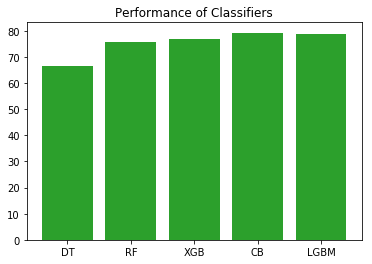

In [25]:
heights = map(lambda x: x * 100, [accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_cb, accuracy_lgbm])
plt.bar(['DT', 'RF', 'XGB', 'CB', 'LGBM'], list(heights))
plt.title('Performance of Classifiers')
plt.show()